In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorboard.backend.event_processing import event_accumulator

In [2]:
FOLDS = ["../logs/log_0", "../logs/log_1", "../logs/log_2"]

TRAIN_METRIC_N_LOSS = ["acc", "f1", "precision", "recall", "loss"]
TEST_METRIC_N_LOSS  = ["val_acc", "val_f1", "val_precision", "val_recall", "val_loss"]

skip_N = 1

In [3]:
tbs = []
for fold in FOLDS:
    tbs.append(os.listdir(fold)[0])

In [4]:
for k, nth_fold in enumerate(FOLDS):
    train_logs = []
    test_logs  = []
    
    ea = event_accumulator.EventAccumulator(nth_fold+"/"+tbs[k],
                                            size_guidance={ # see below regarding this argument
                                                event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                                                event_accumulator.IMAGES: 4,
                                                event_accumulator.AUDIO: 4,
                                                event_accumulator.SCALARS: 0,
                                                event_accumulator.HISTOGRAMS: 1})

    ea.Reload()
    for i in range(len(TRAIN_METRIC_N_LOSS)):
        train_logs.append(pd.DataFrame(ea.Scalars(TRAIN_METRIC_N_LOSS[i])))
        test_logs.append(pd.DataFrame(ea.Scalars(TEST_METRIC_N_LOSS[i])))
    
    globals()[nth_fold] = [train_logs, test_logs]

In [5]:
for m in FOLDS:
    n_train_logs = []
    n_test_logs  = []
    
    for (train, test) in zip(globals()[m][0], globals()[m][1]):
        n_train = []
        n_test  = []

        for ix, i in enumerate(train['value'].tolist()):
            if ix%skip_N==0:
                n_train.append(i)

        for ix, i in enumerate(test['value'].tolist()):
            if ix%1==0:
                n_test.append(i)

        n_train_logs.append(n_train)
        n_test_logs.append(n_test)
    
    globals()["n_"+m] = [n_train_logs, n_test_logs]

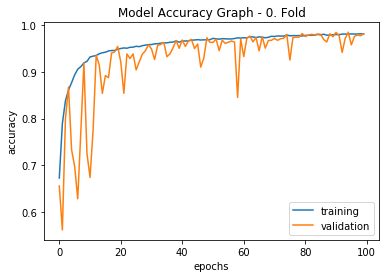

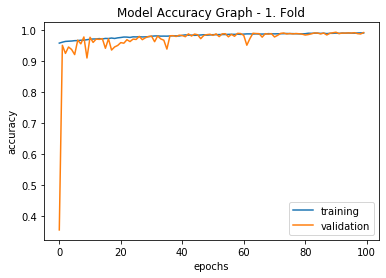

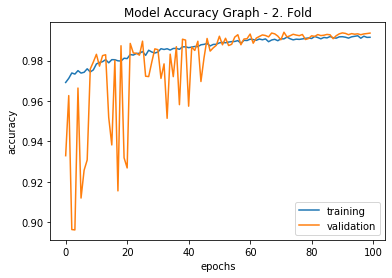

In [6]:
for ix, fold in enumerate(FOLDS):
    txt = 'Model Accuracy Graph - {}. Fold'.format(ix)
    plt.plot(globals()["n_"+fold][0][0])
    plt.plot(globals()["n_"+fold][1][0])
    plt.title(txt)
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.savefig(txt+'.png', dpi=150)
    plt.show()

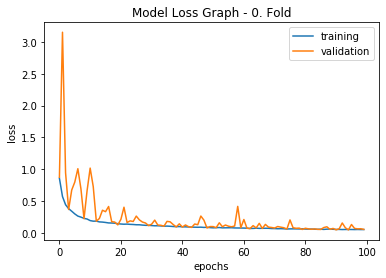

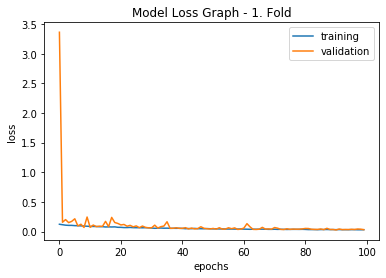

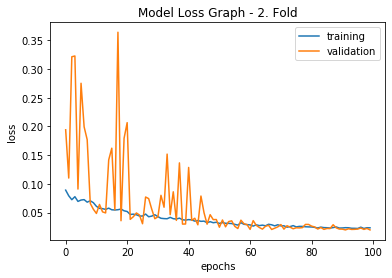

In [7]:
for ix, fold in enumerate(FOLDS):
    txt = 'Model Loss Graph - {}. Fold'.format(ix)
    plt.plot(globals()["n_"+fold][0][4])
    plt.plot(globals()["n_"+fold][1][4])
    plt.title(txt)
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.savefig(txt+'.png', dpi=150)
    plt.show()